In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HousingData.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.fillna(df.median(), inplace=True)

In [7]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [8]:
tranformer=StandardScaler()
X_train,X_test,Y_train,Y_test= train_test_split(
    X,Y,test_size=0.2,random_state=42)

In [9]:
X_processed_train=tranformer.fit_transform(X_train)
X_processed_test=tranformer.transform(X_test)

In [10]:
model=LinearRegression()

In [11]:
model.fit(X_processed_train,Y_train)

LinearRegression()

In [12]:
linear_pred=model.predict(X_processed_test)
score=r2_score(Y_test,linear_pred)
score

0.659101389390351

In [13]:
ridge_model=Ridge()

In [14]:
parameters={'alpha':[1,2,5,10,15,20,30,40,50,60,70,80,90]}
ridge_cv=GridSearchCV(ridge_model,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')
ridge_cv.fit(X_processed_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [15]:
ridge_pred=ridge_cv.predict(X_processed_test)

In [16]:
lasso_model=Lasso()

In [17]:
parameters={'alpha':[1,2,5,10,15,20,30,40,50,60,70,80,90]}
lasso_cv=GridSearchCV(lasso_model,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')
lasso_cv.fit(X_processed_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [18]:
lasso_pred=lasso_cv.predict(X_processed_test)

In [19]:
elatic_model=ElasticNet()

In [20]:
parameters={'alpha':[1,2,5,10,15,20,30,40,50,60,70,80,90]}
elastic_cv=GridSearchCV(elatic_model,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')
elastic_cv.fit(X_processed_train,Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [21]:
elastic_pred=elastic_cv.predict(X_processed_test)

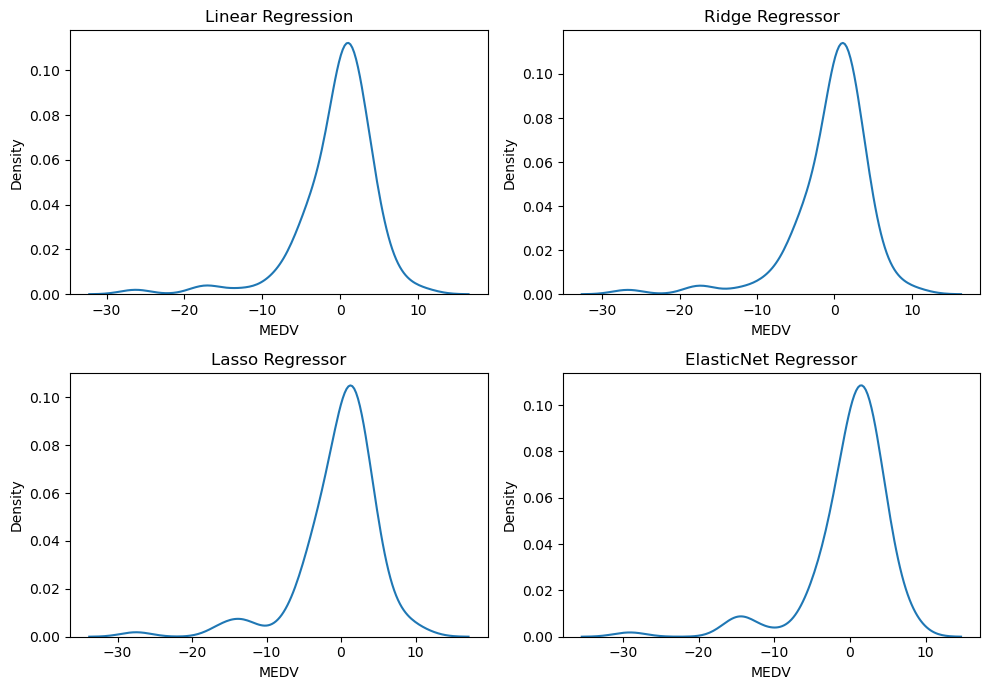

In [22]:
fig ,axs=plt.subplots(2,2 ,figsize=(10,7))

sns.kdeplot(linear_pred - Y_test,ax=axs[0,0])
axs[0,0].set_title('Linear Regression')

sns.kdeplot(ridge_pred - Y_test,ax=axs[0,1])
axs[0,1].set_title('Ridge Regressor')

sns.kdeplot(lasso_pred - Y_test,ax=axs[1,0])
axs[1,0].set_title('Lasso Regressor')

sns.kdeplot(elastic_pred - Y_test,ax=axs[1,1])
axs[1,1].set_title('ElasticNet Regressor')

plt.tight_layout()
plt.show()